In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.drop(columns=['Channel', 'Region'], inplace=True)

In [3]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

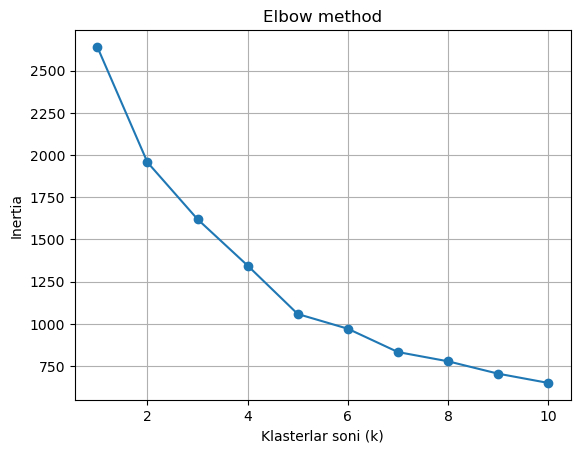

In [6]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Klasterlar soni (k)')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.grid(True)
plt.show()

In [8]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(X)

KMeans(n_clusters=5)

In [9]:
Kmeans.labels_

array([0, 1, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       4, 1, 1, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 1, 4, 1, 1, 4, 4, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 4, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 0, 4, 4, 0, 4, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 4,
       0, 4, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 1, 1, 0, 4, 0, 0, 1, 1, 0, 1,
       0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       4, 0, 0, 0, 0, 4, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 4, 1,
       0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [10]:
df['Cluster'] = Kmeans.labels_

In [11]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,4
436,39228,1431,764,4510,93,2346,4
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


In [12]:
df.groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,9548.257246,3014.894928,3847.873188,2301.909420,975.228261,983.934783
1,5989.540816,10837.581633,16486.295918,1446.663265,7136.336735,1823.448980
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
4,33842.563636,4820.509091,5733.690909,9226.727273,915.309091,2605.600000


### Cluster 0
### Bular oddiy xarid qiluvchilar ekan barcha kategoriyalarda harajatlari o'rtacha yoki past. 
### Bular uchun umumiy reklama va sodiq qolish uchun qoshimcha cashback har bir haridi uchun va 
### aksiya shaklida 1+1, 2+2 kabi narsalar taklif qilish kerek sotib olish soniga qarab

### Cluster 1 Milk, Grocery, Detergants_Paper
### Bu mijozlar sut, oziq-ovqat va tozalovchi mahsulotlarga kop sarflashadi
### Bu mijozlarga maxsus sut oziq ovqat paketini taklif qilish va tocalovchi mahsulotlar bilan 
### birga marketing qilish kerek

### Cluster 2 Milk, Grocery, Detergants_Paper
### Juda katta xarid qiluvchilar korporativ mijozlar bolishi mumkin
### Bular supermarketlar yoki katta biznesmenlar bolishi mumkin
### bularga B2B taklif qilish kerek doimiy shartnomalar taklif qilib turish kerek

### Cluster 3 Fresh Frozen Delikates
### Bu mijozlar yuqori sifat istaganlar restoran cafe delikate dokonlar
### Premium mahsulotlar eksklyusiv narxlar taklif qilish kerek, luxury ximatlar yani yetkizib berish taklif qilish kerek

### Cluster 4 Fresh Frozen Delicasen
### Bu klasterda ham svejiy va muzlatilgan mahsulotlar muhim
### Yangi va tez buziladigan mahsulotlar uchun yetkazib berishni kuchaytirish

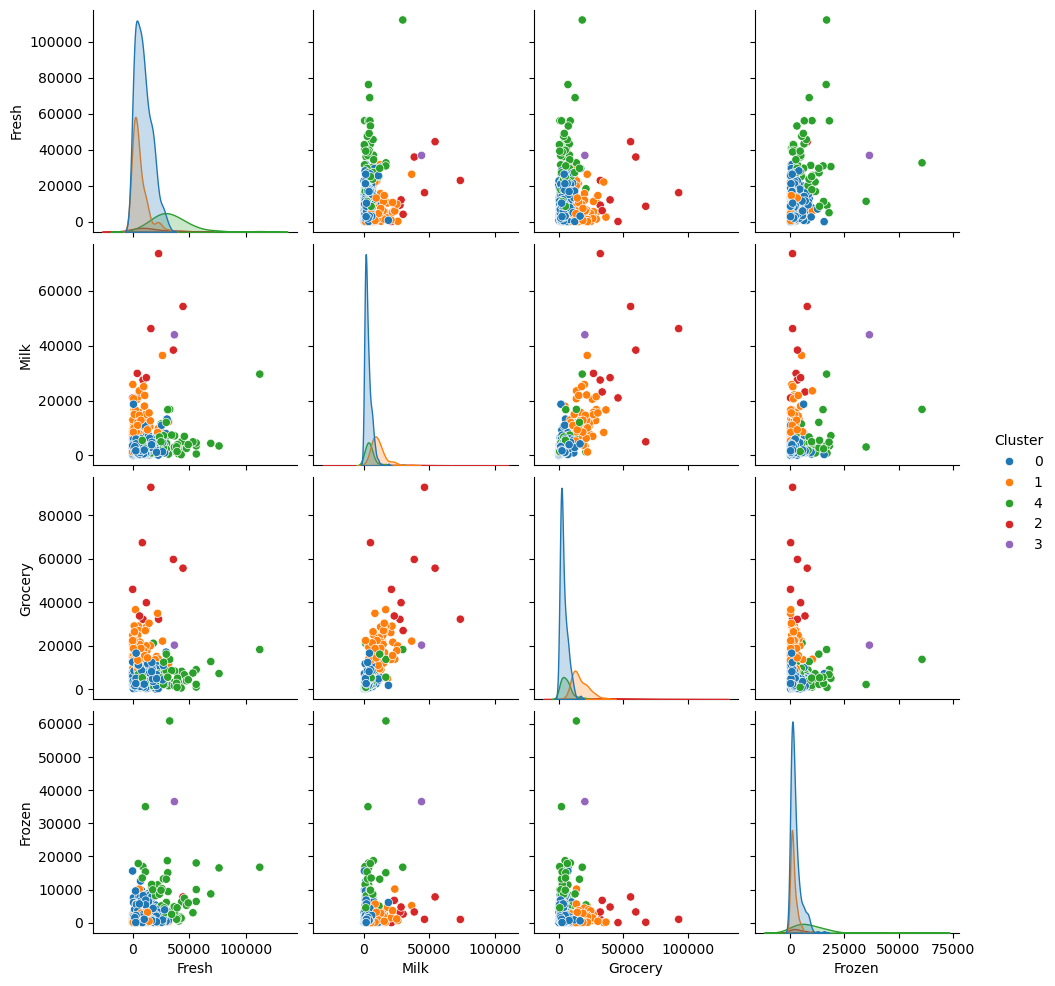

In [20]:
import seaborn as sns

df['Cluster'] = df['Cluster'].astype(str)

selected_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Cluster']
sns.pairplot(df[selected_cols], hue='Cluster')
plt.show()


<Figure size 1200x600 with 0 Axes>

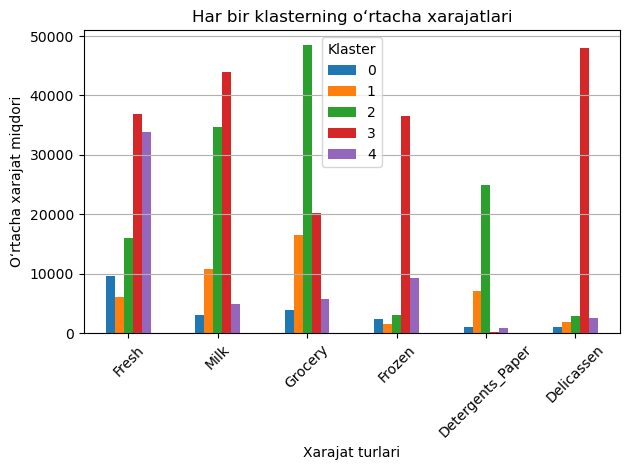

In [24]:
means = df.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
means.T.plot(kind='bar')

plt.title("Har bir klasterning o‘rtacha xarajatlari")
plt.ylabel("O‘rtacha xarajat miqdori")
plt.xlabel("Xarajat turlari")
plt.xticks(rotation=45)
plt.legend(title="Klaster")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
